In [1]:
library("limma")
library("edgeR")

In [2]:
source("/ufrc/soltis/shan158538/TragFL_NewAnalysis/SLURM/rnaseq_plot_funcs.R")

In [3]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/Additive_expression_Tms')

In [4]:
targets <- readTargets()

In [5]:
print(targets)

                                files group description
1     both_counts_Tdu_4_2_Tdu_Tpr.csv   Tdu       Tdu_4
2     both_counts_Tdu_5_2_Tdu_Tpr.csv   Tdu       Tdu_5
3     both_counts_Tdu_6_2_Tdu_Tpr.csv   Tdu       Tdu_6
4     both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1
5     both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2
6     both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3
7 both_counts_new_Tms_1_2_tdu_tpr.csv   Tms       Tms_1
8 both_counts_new_Tms_2_2_tdu_tpr.csv   Tms       Tms_2
9 both_counts_new_Tms_3_2_tdu_tpr.csv   Tms       Tms_3


In [6]:
d <- readDGE(targets, sep=",")

In [7]:
print(dim(d))

[1] 11864     9


In [8]:
colnames(d) <- c("Tdu4","Tdu5","Tdu6","Tpr1","Tpr2","Tpr3","Tms1","Tms2","Tms3")

In [9]:
printHead(d)

$samples
                                   files group description lib.size
Tdu4     both_counts_Tdu_4_2_Tdu_Tpr.csv   Tdu       Tdu_4   900223
Tdu5     both_counts_Tdu_5_2_Tdu_Tpr.csv   Tdu       Tdu_5  1109924
Tdu6     both_counts_Tdu_6_2_Tdu_Tpr.csv   Tdu       Tdu_6   982266
Tpr1     both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1   800814
Tpr2     both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2  1454907
Tpr3     both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3   708250
Tms1 both_counts_new_Tms_1_2_tdu_tpr.csv   Tms       Tms_1   535154
Tms2 both_counts_new_Tms_2_2_tdu_tpr.csv   Tms       Tms_2   443952
Tms3 both_counts_new_Tms_3_2_tdu_tpr.csv   Tms       Tms_3   784709
     norm.factors
Tdu4            1
Tdu5            1
Tdu6            1
Tpr1            1
Tpr2            1
Tpr3            1
Tms1            1
Tms2            1
Tms3            1

$counts
                                                      Samples
Tags                                                   Tdu4 

In [10]:
all_samples = as.matrix(d$counts)

In [11]:
colnames(all_samples) <- d$samples$description

In [12]:
write.csv(all_samples, "all_samples.csv")

In [13]:
keep <- rowSums(cpm(d) > cpm(10,mean(d$samples$lib.size))[1]) >= 3

# ">= 3" means have to meet the condidtion in as least 3 samples. This is because there are 3 replciates per species

In [14]:
d <- d[keep,, keep.lib.sizes=FALSE]

# keep.lib.sizes=FALSE causes the library sizes to be recomputed after the filtering

In [15]:
print(dim(d))

[1] 8327    9


# After removing low counts orthologs, there are 8,327 loci left

In [16]:
pdf("additive_boxplot_log-CPM.pdf")

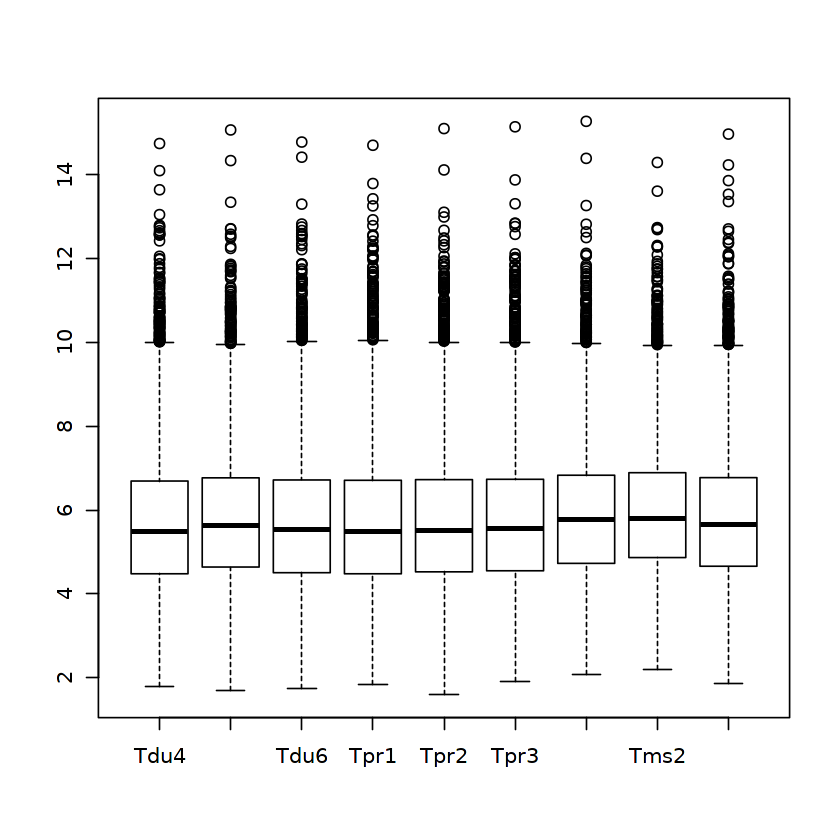

In [17]:
boxplot(cpm(d$counts + 1, log=TRUE))

In [18]:
dev.off()

pdf 
  3

In [19]:
trt = factor(c(1,1,1,2,2,2,3,3,3), labels=c("Tdu","Tpr","Tms"))
design=model.matrix(~0 + trt)

In [20]:
pdf("additive_voom_plot.pdf")

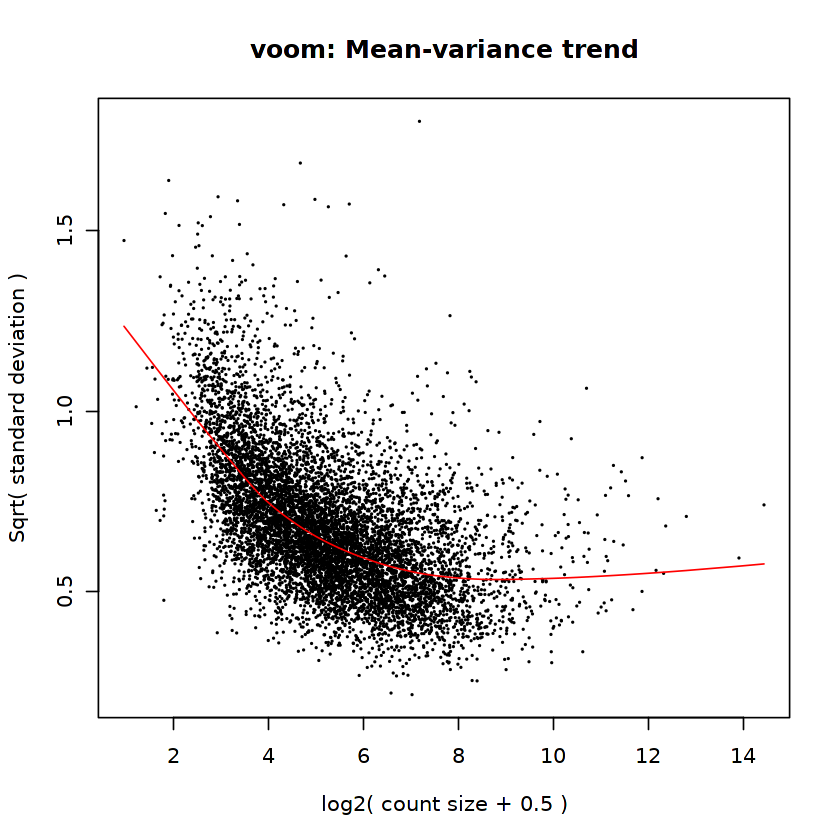

In [21]:
voom=voom(d, design, plot=TRUE)

In [22]:
dev.off()

pdf 
  3

In [23]:
write.table(voom$E, "additive_voom_expression_values.txt", sep="\t", quote=F, row.names = TRUE)
fit = lmFit(voom, design)
overall_model <- eBayes(fit)

In [24]:
pdf("additive_residual_std_dev.pdf")

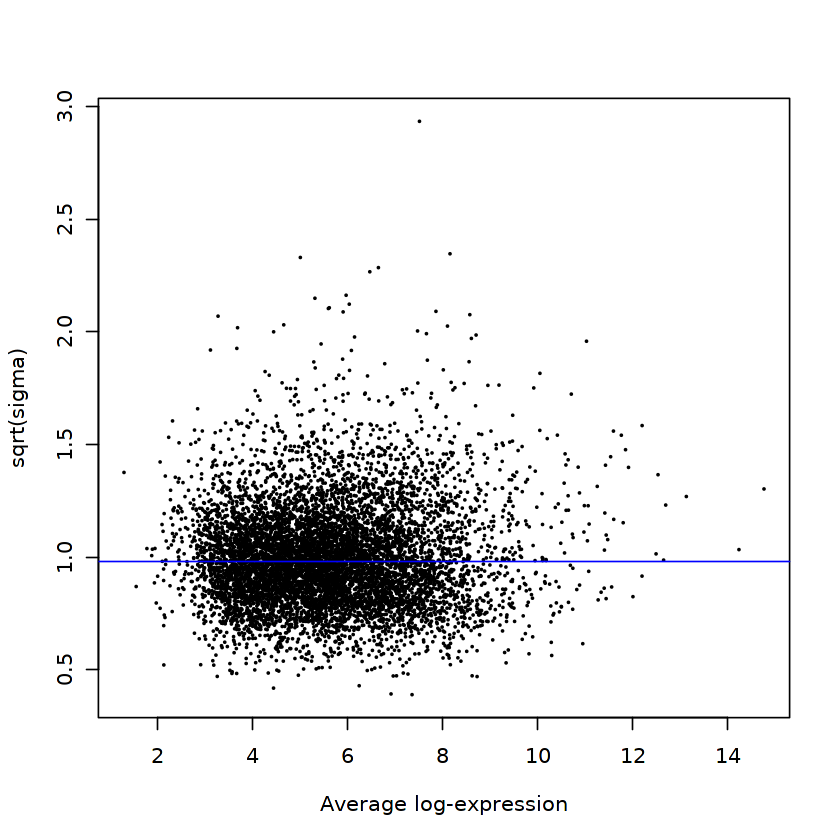

In [25]:
plotSA(overall_model)

In [26]:
dev.off()

pdf 
  3

In [27]:
topTable(overall_model, coef=ncol(design))
top=topTable(overall_model, sort="none", n=Inf, coef=ncol(design))
write.table(top, "additive_DE_overall_model.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN11525_c2_g3|Tdu_TRINITY_DN17060_c5_g3,11.149480,10.943346,88.78156,2.601900e-19,7.252784e-16,31.88443
Tpr_TRINITY_DN11540_c1_g1|Tdu_TRINITY_DN14814_c0_g1,10.279927,10.289590,84.49879,4.908150e-19,7.252784e-16,31.60940
Tpr_TRINITY_DN11309_c0_g2|Tdu_TRINITY_DN20766_c2_g1,10.092689,9.811572,82.91814,6.254266e-19,7.252784e-16,31.47895
Tpr_TRINITY_DN12663_c2_g2|Tdu_TRINITY_DN16907_c0_g1,11.792752,11.999488,82.28322,6.902730e-19,7.252784e-16,31.25677
Tpr_TRINITY_DN11622_c2_g1|Tdu_TRINITY_DN16617_c0_g1,9.804750,10.280604,79.21891,1.123427e-18,7.252784e-16,31.13716
Tpr_TRINITY_DN13388_c2_g1|Tdu_TRINITY_DN21865_c3_g1,10.447173,10.318694,79.05754,1.153212e-18,7.252784e-16,31.09475
Tpr_TRINITY_DN11819_c3_g2|Tdu_TRINITY_DN17347_c2_g1,11.486005,11.329399,79.57919,1.059881e-18,7.252784e-16,31.04852
Tpr_TRINITY_DN11788_c1_g1|Tdu_TRINITY_DN16794_c2_g2,10.838056,10.387836,78.74694,1.212963e-18,7.252784e-16,31.03425
Tpr_TRINITY_DN13391_c2_g2|Tdu_TRINITY_DN22283_c3_g1,9.743870,9.889243,77.93043,1.386539e-18,7.252784e-16,31.00818


In [28]:
print(summary(top))

     logFC            AveExpr             t              P.Value        
 Min.   :-0.1745   Min.   : 1.287   Min.   :-0.2083   Min.   :0.000000  
 1st Qu.: 4.5504   1st Qu.: 4.371   1st Qu.:12.9308   1st Qu.:0.000000  
 Median : 5.6196   Median : 5.453   Median :21.8763   Median :0.000000  
 Mean   : 5.6922   Mean   : 5.597   Mean   :24.4795   Mean   :0.005047  
 3rd Qu.: 6.7742   3rd Qu.: 6.657   3rd Qu.:33.2003   3rd Qu.:0.000000  
 Max.   :14.6288   Max.   :14.758   Max.   :88.7816   Max.   :0.897783  
   adj.P.Val              B         
 Min.   :0.000000   Min.   :-6.158  
 1st Qu.:0.000000   1st Qu.:10.586  
 Median :0.000000   Median :16.915  
 Mean   :0.005069   Mean   :15.902  
 3rd Qu.:0.000000   3rd Qu.:21.984  
 Max.   :0.897783   Max.   :31.884  


# Comparing Tdu and Tpr, results are relative to Tdu

In [29]:
contrast.matrix = makeContrasts(contrasts=c("trtTpr-trtTdu"), levels=design)
fit2 = contrasts.fit(fit, contrast.matrix)
fit2 = eBayes(fit2)

In [30]:
topTable(fit2, coef=ncol(contrast.matrix))
top=topTable(fit2, sort="none", n=Inf, coef=ncol(contrast.matrix))
write.table(top, "DE_Tdu_Tpr.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN11618_c0_g5|Tdu_TRINITY_DN24489_c1_g3,-5.720508,7.005447,-16.02000,7.135274e-10,5.941543e-06,12.322545
Tpr_TRINITY_DN11894_c0_g1|Tdu_TRINITY_DN15151_c0_g1,-3.153940,6.632819,-12.85220,1.036818e-08,4.316792e-05,10.421968
Tpr_TRINITY_DN10604_c3_g3|Tdu_TRINITY_DN18047_c0_g1,-2.742003,6.805073,-11.57579,3.600209e-08,6.928693e-05,9.289690
Tpr_TRINITY_DN10137_c4_g1|Tdu_TRINITY_DN22038_c0_g4,3.005335,7.259229,11.44818,4.103133e-08,6.928693e-05,9.175903
Tpr_TRINITY_DN10582_c3_g4|Tdu_TRINITY_DN19797_c3_g1,3.458934,5.594188,11.43473,4.160377e-08,6.928693e-05,8.912317
Tpr_TRINITY_DN1078_c0_g1|Tdu_TRINITY_DN9793_c0_g1,2.764516,6.994829,10.57531,1.038090e-07,9.778033e-05,8.268488
Tpr_TRINITY_DN12303_c1_g2|Tdu_TRINITY_DN18685_c2_g4,-3.353057,8.109819,-10.43706,1.209365e-07,9.778033e-05,8.117225
Tpr_TRINITY_DN12686_c2_g3|Tdu_TRINITY_DN20268_c7_g1,2.718114,6.305580,10.42501,1.225657e-07,9.778033e-05,8.064003
Tpr_TRINITY_DN12124_c1_g1|Tdu_TRINITY_DN20551_c2_g1,3.358094,7.116214,10.33690,1.352218e-07,9.778033e-05,8.006650


# Comparing (Tdu+Tpr)/2 and Tms, results are relative to Tms

In [31]:
contrast.matrix=makeContrasts(contrasts=c("(trtTdu+trtTpr)/2-trtTms"), levels=design)
fit2=contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [32]:
topTable(fit2, coef=ncol(contrast.matrix))
top=topTable(fit2, sort="none", n=Inf, coef=ncol(contrast.matrix))
write.table(top, "DE_additive_Tdu_Tpr-Tms.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN10855_c3_g7|Tdu_TRINITY_DN23834_c1_g2,2.324433,8.026257,11.521707,3.804794e-08,0.0001584126,9.150254
Tpr_TRINITY_DN15984_c4_g3|Tdu_TRINITY_DN22258_c5_g4,4.552181,8.718533,11.633262,3.395664e-08,0.0001584126,9.112176
Tpr_TRINITY_DN12489_c0_g7|Tdu_TRINITY_DN24194_c4_g3,-2.411991,6.190533,-10.434023,1.213448e-07,0.0003216478,8.072870
Tpr_TRINITY_DN11938_c4_g1|Tdu_TRINITY_DN23777_c2_g1,2.238263,7.077595,10.136736,1.694687e-07,0.0003216478,7.656162
Tpr_TRINITY_DN10734_c0_g1|Tdu_TRINITY_DN23311_c1_g1,2.561711,8.016903,10.022246,1.931355e-07,0.0003216478,7.620190
Tpr_TRINITY_DN11700_c2_g3|Tdu_TRINITY_DN18621_c0_g2,2.282486,9.025865,9.379341,4.115682e-07,0.0005203914,6.916860
Tpr_TRINITY_DN11118_c3_g2|Tdu_TRINITY_DN22303_c4_g1,1.753806,8.882748,9.219813,4.996341e-07,0.0005203914,6.725726
Tpr_TRINITY_DN12489_c0_g1|Tdu_TRINITY_DN22258_c5_g2,2.728032,7.814604,8.692515,9.660974e-07,0.0008044693,6.069807
Tpr_TRINITY_DN15003_c0_g1|Tdu_TRINITY_DN22154_c2_g1,-2.385928,5.903519,-8.437919,1.342402e-06,0.0010161980,5.760867


In [33]:
pdf("additive_MDS_plot.pdf")

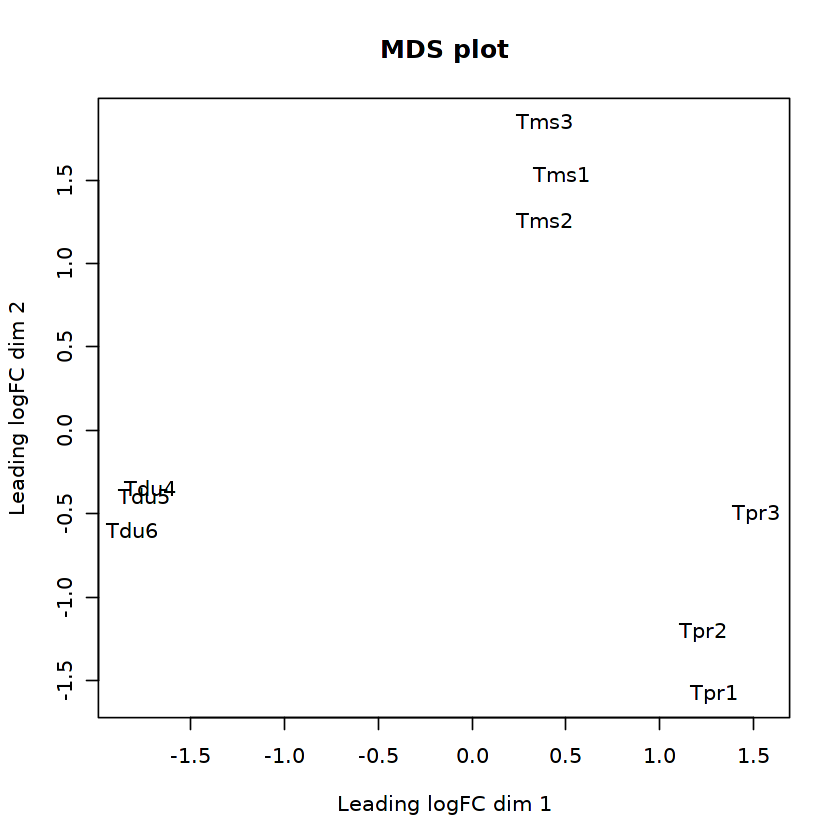

In [34]:
plotMDS(voom, main="MDS plot")

In [35]:
dev.off()

pdf 
  3